# Load Data

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import cv2
import random
import os
import numpy as np

In [4]:
anno_path_box = "./dataset/Annotations/daySequence1/frameAnnotationsBOX.csv"
anno_path_bulb = "./dataset/Annotations/daySequence1/frameAnnotationsBULB.csv"
frames_path = "./dataset/daySequence1/frames/"

images = []
labels = []
with open(anno_path_box) as fp:  
    line = fp.readline()
    line = fp.readline() # Skip header line with descriptions

    while line:
        anno_file_path = (line.strip()).split(";")
        anno_file_id = anno_file_path[0].split("/")[1]
        
        file_name = os.path.join(os.path.join(frames_path, anno_file_id))
        
        anno_left = int(anno_file_path[2])
        anno_top = int(anno_file_path[3])
        anno_right = int(anno_file_path[4])
        anno_bot = int(anno_file_path[5])
        
        file = cv2.imread(file_name)
        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        crop = file[anno_top:anno_bot, anno_left:anno_right]
        resized = cv2.resize(crop, (32, 64))
        
        images.append(resized)
        labels.append(
            {'go': 0,
             'goLeft': 0,
             'goForward': 0,
             'warning': 1,
             'warningLeft': 1,
             'stop': 2,
             'stopLeft': 2
            }[anno_file_path[1]]
        )
        
        line = fp.readline()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), test_size=0.33, random_state=42)

In [6]:
n_train = len(X_train)
n_test = len(X_test)
image_shape = X_train[0].shape
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 5293
Number of testing examples = 2607
Image data shape = (64, 32, 3)
Number of classes = 3


# Train NN

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers
from keras.models import load_model

Using TensorFlow backend.


In [8]:
categorical_labels = to_categorical(y_train)

In [9]:
num_classes = 3
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
#Dropout(0.8)
#model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
#model.add(MaxPooling2D(2,2))
Dropout(0.5)
model.add(Flatten())

#model.add(Dense(128, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))

In [10]:
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()

In [11]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

In [12]:
model.fit(X_train, categorical_labels, batch_size=64, epochs=100, verbose=True, validation_split=0.1, shuffle=True)

Train on 4763 samples, validate on 530 samples
Epoch 1/100
4763/4763 [==============================] - 5s 1ms/step - loss: 2.1029 - acc: 0.8780 - val_loss: 1.2437 - val_acc: 0.9509
Epoch 2/100
4763/4763 [==============================] - 1s 228us/step - loss: 1.1356 - acc: 0.9561 - val_loss: 1.1788 - val_acc: 0.9509
Epoch 3/100
4763/4763 [==============================] - 1s 229us/step - loss: 1.0611 - acc: 0.9578 - val_loss: 1.1104 - val_acc: 0.9566
Epoch 4/100
4763/4763 [==============================] - 1s 227us/step - loss: 1.0070 - acc: 0.9609 - val_loss: 1.0746 - val_acc: 0.9547
Epoch 5/100
4763/4763 [==============================] - 1s 229us/step - loss: 0.9671 - acc: 0.9614 - val_loss: 1.0339 - val_acc: 0.9566
Epoch 6/100
4763/4763 [==============================] - 1s 229us/step - loss: 0.9416 - acc: 0.9603 - val_loss: 1.0075 - val_acc: 0.9566
Epoch 7/100
4763/4763 [==============================] - 1s 228us/step - loss: 0.9060 - acc: 0.9620 - val_loss: 0.9785 - val_acc: 0.9

In [13]:
score = model.evaluate(X_train, categorical_labels, verbose=0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.024741279206932119, 0.99886642735688647]


In [5]:
import h5py
model.save('traffic_light_classifier.h5')

NameError: name 'model' is not defined

In [6]:
loaded_model = load_model('traffic_light_classifier.h5')

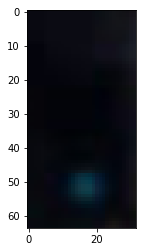

0


array([[  1.00000000e+00,   2.35974833e-11,   9.00124972e-14]], dtype=float32)

In [73]:
from random import randint
index = randint(1, len(X_train)) - 1
img = X_train[index]
plt.imshow(img)
plt.show()
print(y_train[index])

from keras.preprocessing import image
import numpy as np

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

loaded_model.predict(x)

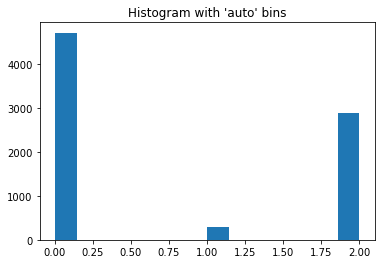

{'go': 0,
 'goForward': 0,
 'goLeft': 0,
 'stop': 2,
 'stopLeft': 2,
 'warning': 1,
 'warningLeft': 1}

In [34]:
plt.hist(labels, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()


{'go': 0,
 'goLeft': 0,
 'goForward': 0,
 'warning': 1,
 'warningLeft': 1,
 'stop': 2,
 'stopLeft': 2
}

In [42]:
categorical_labels

array([[ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]], dtype=float32)

In [41]:
y_train

array([0, 2, 0, ..., 2, 0, 0])

In [8]:
from keras.preprocessing import image
import numpy as np

images_carla = ['227.jpg', '228.jpg', '281.jpg', '282.jpg']

for current_image in images_carla:
    file_440 = cv2.imread(current_image)
    file_440 = cv2.cvtColor(file_440, cv2.COLOR_BGR2RGB);
    resized_440 = cv2.resize(file_440, (32, 64))

    resized_440 = np.array(resized_440)

    x_440 = image.img_to_array(resized_440)
    x_440 = np.expand_dims(x_440, axis=0)

    print(current_image)
    print(loaded_model.predict(x_440))

227.jpg
[[  1.62554067e-10   1.00000000e+00   7.99638133e-11]]
228.jpg
[[  6.66529345e-14   1.00000000e+00   4.23909714e-13]]
281.jpg
[[  1.26009492e-09   8.65753440e-19   1.00000000e+00]]
282.jpg
[[  3.78886935e-26   0.00000000e+00   1.00000000e+00]]
